In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import *

In [2]:
# Read the data into a DataFrame
df = pd.DataFrame({
    'ds': ['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
       '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13', '2017-06-14',
        '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28', 
       '2017-06-29', '2017-06-30'],
    'y': [1067.375, 1017.25, 898.25, 753.25, 1060.5, 1064.875, 1069.25, 1074.375, 1049.125, 900.75, 783.625, 1051.875, 1032.0, 1025.25, 1050.5, 1079.625, 883.625, 762.125, 1017.5, 1051.875, 1065.875, 1033.0, 1046.625, 902.375, 777.75, 1027.625, 983.125, 1010.625, 1016.25, 1040.625]

})

df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
25,2017-06-26,1027.625
26,2017-06-27,983.125
27,2017-06-28,1010.625
28,2017-06-29,1016.250
29,2017-06-30,1040.625


00:13:36 - cmdstanpy - INFO - Chain [1] start processing
00:13:36 - cmdstanpy - INFO - Chain [1] done processing


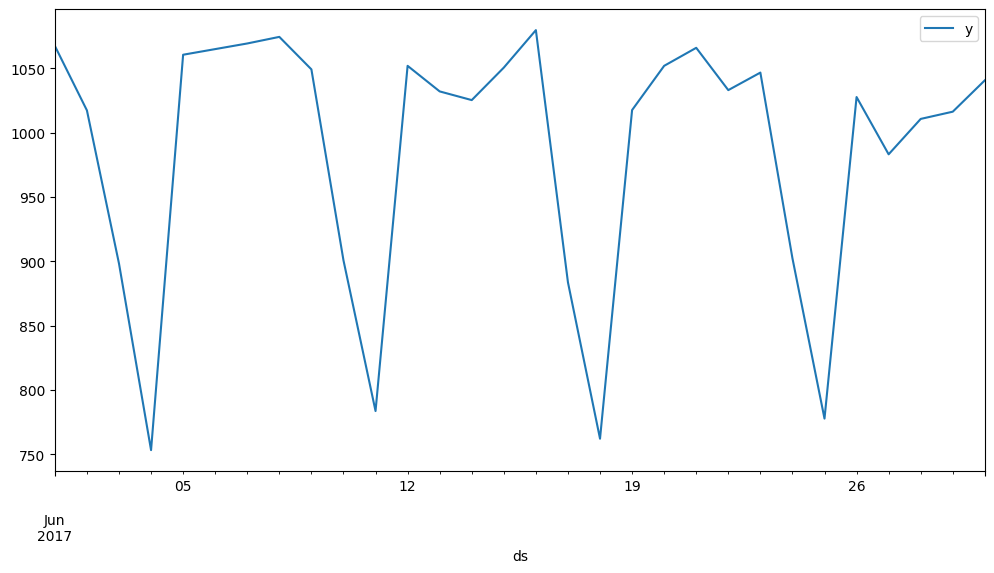

In [3]:
df.plot(x ='ds', y ='y', figsize =(12,6))

train_section=df.iloc[:21]
test_section=df.iloc[21:]

model = Prophet()
model.fit(train_section)
future_value = model.make_future_dataframe(periods=40)
forecast = model.predict(future_value)

In [4]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2017-07-27,1040.284884,1011.705563,1067.679684
57,2017-07-28,1024.309756,992.787535,1054.736726
58,2017-07-29,869.301297,838.118805,899.034071
59,2017-07-30,740.877857,707.751131,771.790730
60,2017-07-31,1017.281924,984.032032,1048.747071


In [5]:
plot_plotly(model, forecast)

In [6]:
plot_components_plotly(model, forecast)

In [7]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

predictions = forecast.iloc[:9]['yhat']
test_data = test_section['y']

rmse_value = rmse(predictions, test_data)
mae_value = mean_absolute_error(predictions, test_data)

print("RMSE =", rmse_value)
print("MAE =", mae_value)
print("Mean =", test_data.mean())

RMSE = 34.95382916641024
MAE = 27.049250907145392
Mean = 982.0
